In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams['font.family'] = 'AppleGothic'
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [276]:
data_dir = '/Volumes/Data/Row_Data'
file_name = '한국전력거래소_시간별 전국 전력수요량_20231231.csv'
url = f'{data_dir}/{file_name}'
df = pd.read_csv(url, encoding='euc-kr')
df.head(5)


,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2023-01-01,64322,61879,60133,59170,58813,59352,59971,60301,59890,...,52695,55879,60282,64447,66465,66199,66018,65477,65404,65676
1,2023-01-02,63083,60897,59751,59360,60127,62341,66729,74246,83138,...,78573,81324,84900,85269,83170,80813,78270,75816,75484,75299
2,2023-01-03,71842,69513,68141,67409,67797,69567,73423,79563,87110,...,80206,82581,86163,86690,84888,82717,79738,77372,77160,76931
3,2023-01-04,73087,70684,69165,68327,68569,70168,73743,79699,86766,...,80727,82873,85342,85151,83548,81754,79119,76907,76504,76197
4,2023-01-05,72474,70042,68646,67878,68126,69726,73520,79108,87276,...,82741,83862,85562,85427,83751,81791,78870,76334,75929,75685


In [278]:
columns = list(range(24))
columns.insert(0, 'baseDatetime')
df.columns = columns
df.head(5)

,baseDatetime,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2023-01-01,64322,61879,60133,59170,58813,59352,59971,60301,59890,...,52695,55879,60282,64447,66465,66199,66018,65477,65404,65676
1,2023-01-02,63083,60897,59751,59360,60127,62341,66729,74246,83138,...,78573,81324,84900,85269,83170,80813,78270,75816,75484,75299
2,2023-01-03,71842,69513,68141,67409,67797,69567,73423,79563,87110,...,80206,82581,86163,86690,84888,82717,79738,77372,77160,76931
3,2023-01-04,73087,70684,69165,68327,68569,70168,73743,79699,86766,...,80727,82873,85342,85151,83548,81754,79119,76907,76504,76197
4,2023-01-05,72474,70042,68646,67878,68126,69726,73520,79108,87276,...,82741,83862,85562,85427,83751,81791,78870,76334,75929,75685


In [280]:
df.melt(id_vars=['baseDatetime']).head(5)

,baseDatetime,variable,value
0,2023-01-01,0,64322
1,2023-01-02,0,63083
2,2023-01-03,0,71842
3,2023-01-04,0,73087
4,2023-01-05,0,72474


In [331]:
df_data = df.melt(id_vars=['baseDatetime']).sort_values(by=['baseDatetime', 'variable'])
df_data

,baseDatetime,variable,value
0,2023-01-01,0,64322
365,2023-01-01,1,61879
730,2023-01-01,2,60133
1095,2023-01-01,3,59170
1460,2023-01-01,4,58813
...,...,...,...
7299,2023-12-31,19,62902
7664,2023-12-31,20,62061
8029,2023-12-31,21,61403
8394,2023-12-31,22,61891


In [332]:
df_data.index = df_data[['baseDatetime', 'variable']].apply( lambda x:  pd.to_datetime(  '%s %02d:00:00' % (x[0], x[1]),  format='%Y-%m-%d %H:%M:%S' )     , axis=1) 
df_data


/var/folders/r5/124yntwj1n7_xfgvd8f6pzv40000gn/T/ipykernel_32578/4204581957.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,baseDatetime,variable,value
2023-01-01 00:00:00,2023-01-01,0,64322
2023-01-01 01:00:00,2023-01-01,1,61879
2023-01-01 02:00:00,2023-01-01,2,60133
2023-01-01 03:00:00,2023-01-01,3,59170
2023-01-01 04:00:00,2023-01-01,4,58813
...,...,...,...
2023-12-31 19:00:00,2023-12-31,19,62902
2023-12-31 20:00:00,2023-12-31,20,62061
2023-12-31 21:00:00,2023-12-31,21,61403
2023-12-31 22:00:00,2023-12-31,22,61891


In [333]:
df_data['baseDatetime'] = df_data.index
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   baseDatetime  8760 non-null   datetime64[ns]
 1   variable      8760 non-null   object        
 2   value         8760 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 273.8+ KB


In [334]:
df_data['weekday'] = df_data['baseDatetime'].dt.weekday
df_data['month'] = df_data['baseDatetime'].dt.month
df_data['day'] = df_data['baseDatetime'].dt.date
df_data.rename(columns={'variable':'hr'}, inplace=True)

In [335]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   baseDatetime  8760 non-null   datetime64[ns]
 1   hr            8760 non-null   object        
 2   value         8760 non-null   int64         
 3   weekday       8760 non-null   int32         
 4   month         8760 non-null   int32         
 5   day           8760 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 410.6+ KB


In [302]:
df_data = df_data[['baseDatetime', 'month', 'weekday', 'day', 'hr', 'value']]
df_data.head(5)

,baseDatetime,month,weekday,day,hr,value
2023-01-01 00:00:00,2023-01-01 00:00:00,1,6,2023-01-01,0,64322
2023-01-01 01:00:00,2023-01-01 01:00:00,1,6,2023-01-01,1,61879
2023-01-01 02:00:00,2023-01-01 02:00:00,1,6,2023-01-01,2,60133
2023-01-01 03:00:00,2023-01-01 03:00:00,1,6,2023-01-01,3,59170
2023-01-01 04:00:00,2023-01-01 04:00:00,1,6,2023-01-01,4,58813


<Axes: xlabel='baseDatetime'>

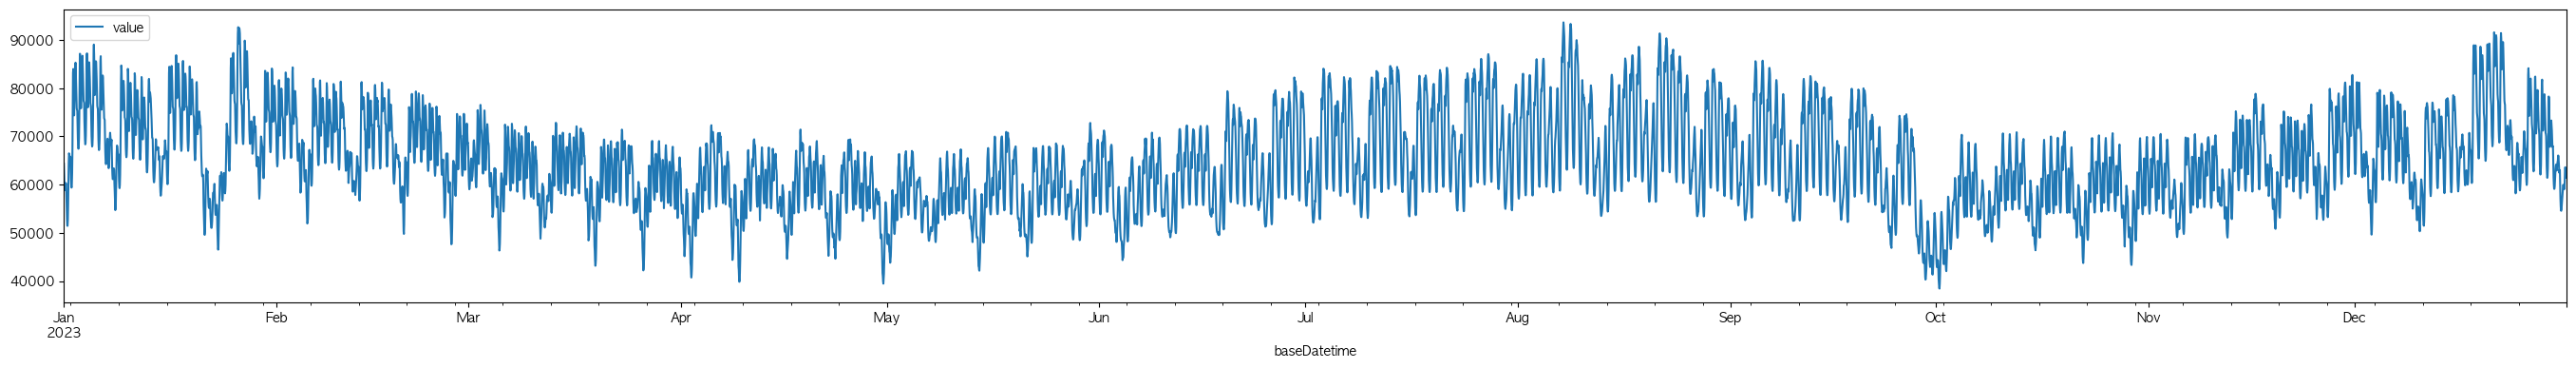

In [310]:
df_data.plot(x='baseDatetime', y='value', figsize=(34,4))

<Axes: xlabel='month'>

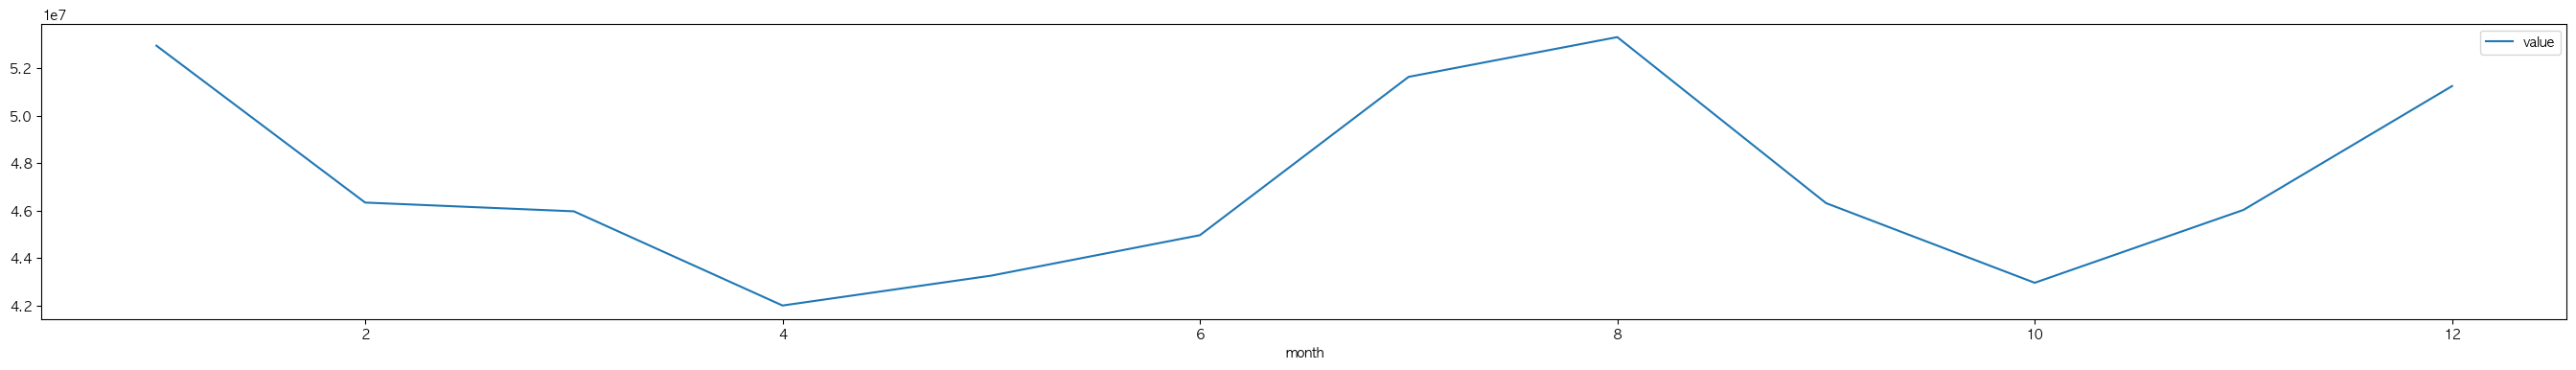

In [321]:
df_data.groupby(['month']).agg({'value':'sum'}).plot( figsize=(34,4))

<Axes: xlabel='day'>

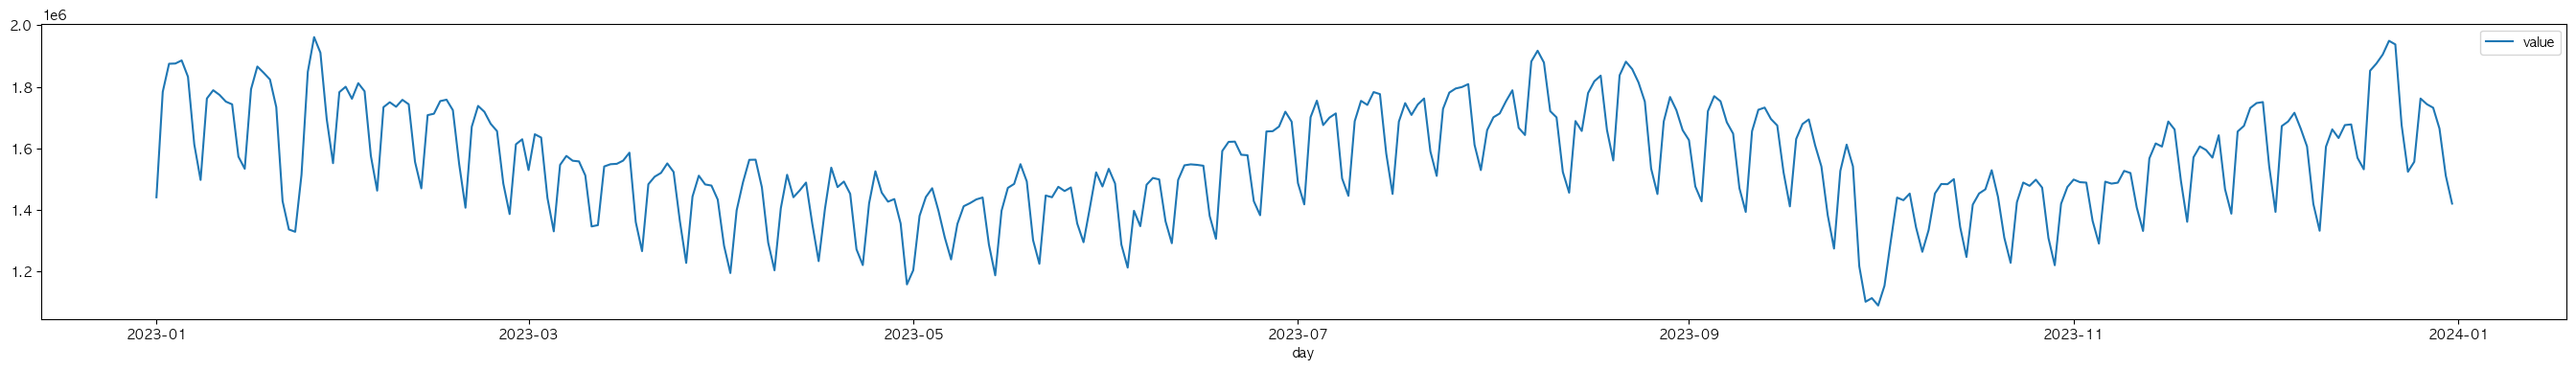

In [324]:
df_data.groupby([ 'day']).agg({'value':'sum'}).plot( figsize=(34,4))

In [ ]:
df_data.resample('D').sum().plot( y='value', figsize=(34,4))

<Axes: >

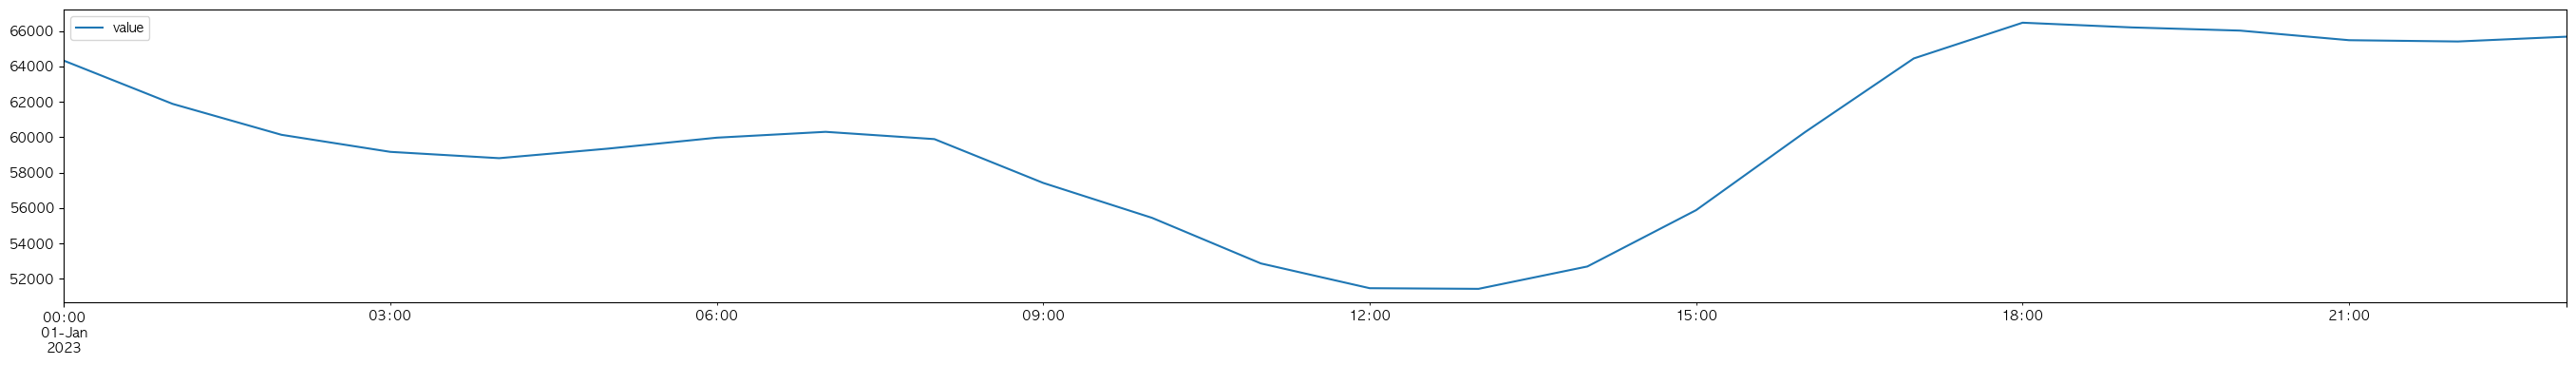

In [366]:

df_data.loc[ pd.to_datetime(df_data['day'], format = '%Y-%m-%d') == '2023-1-1'].plot(y='value', figsize=(34,4))

<Axes: xlabel='hr', ylabel='value'>

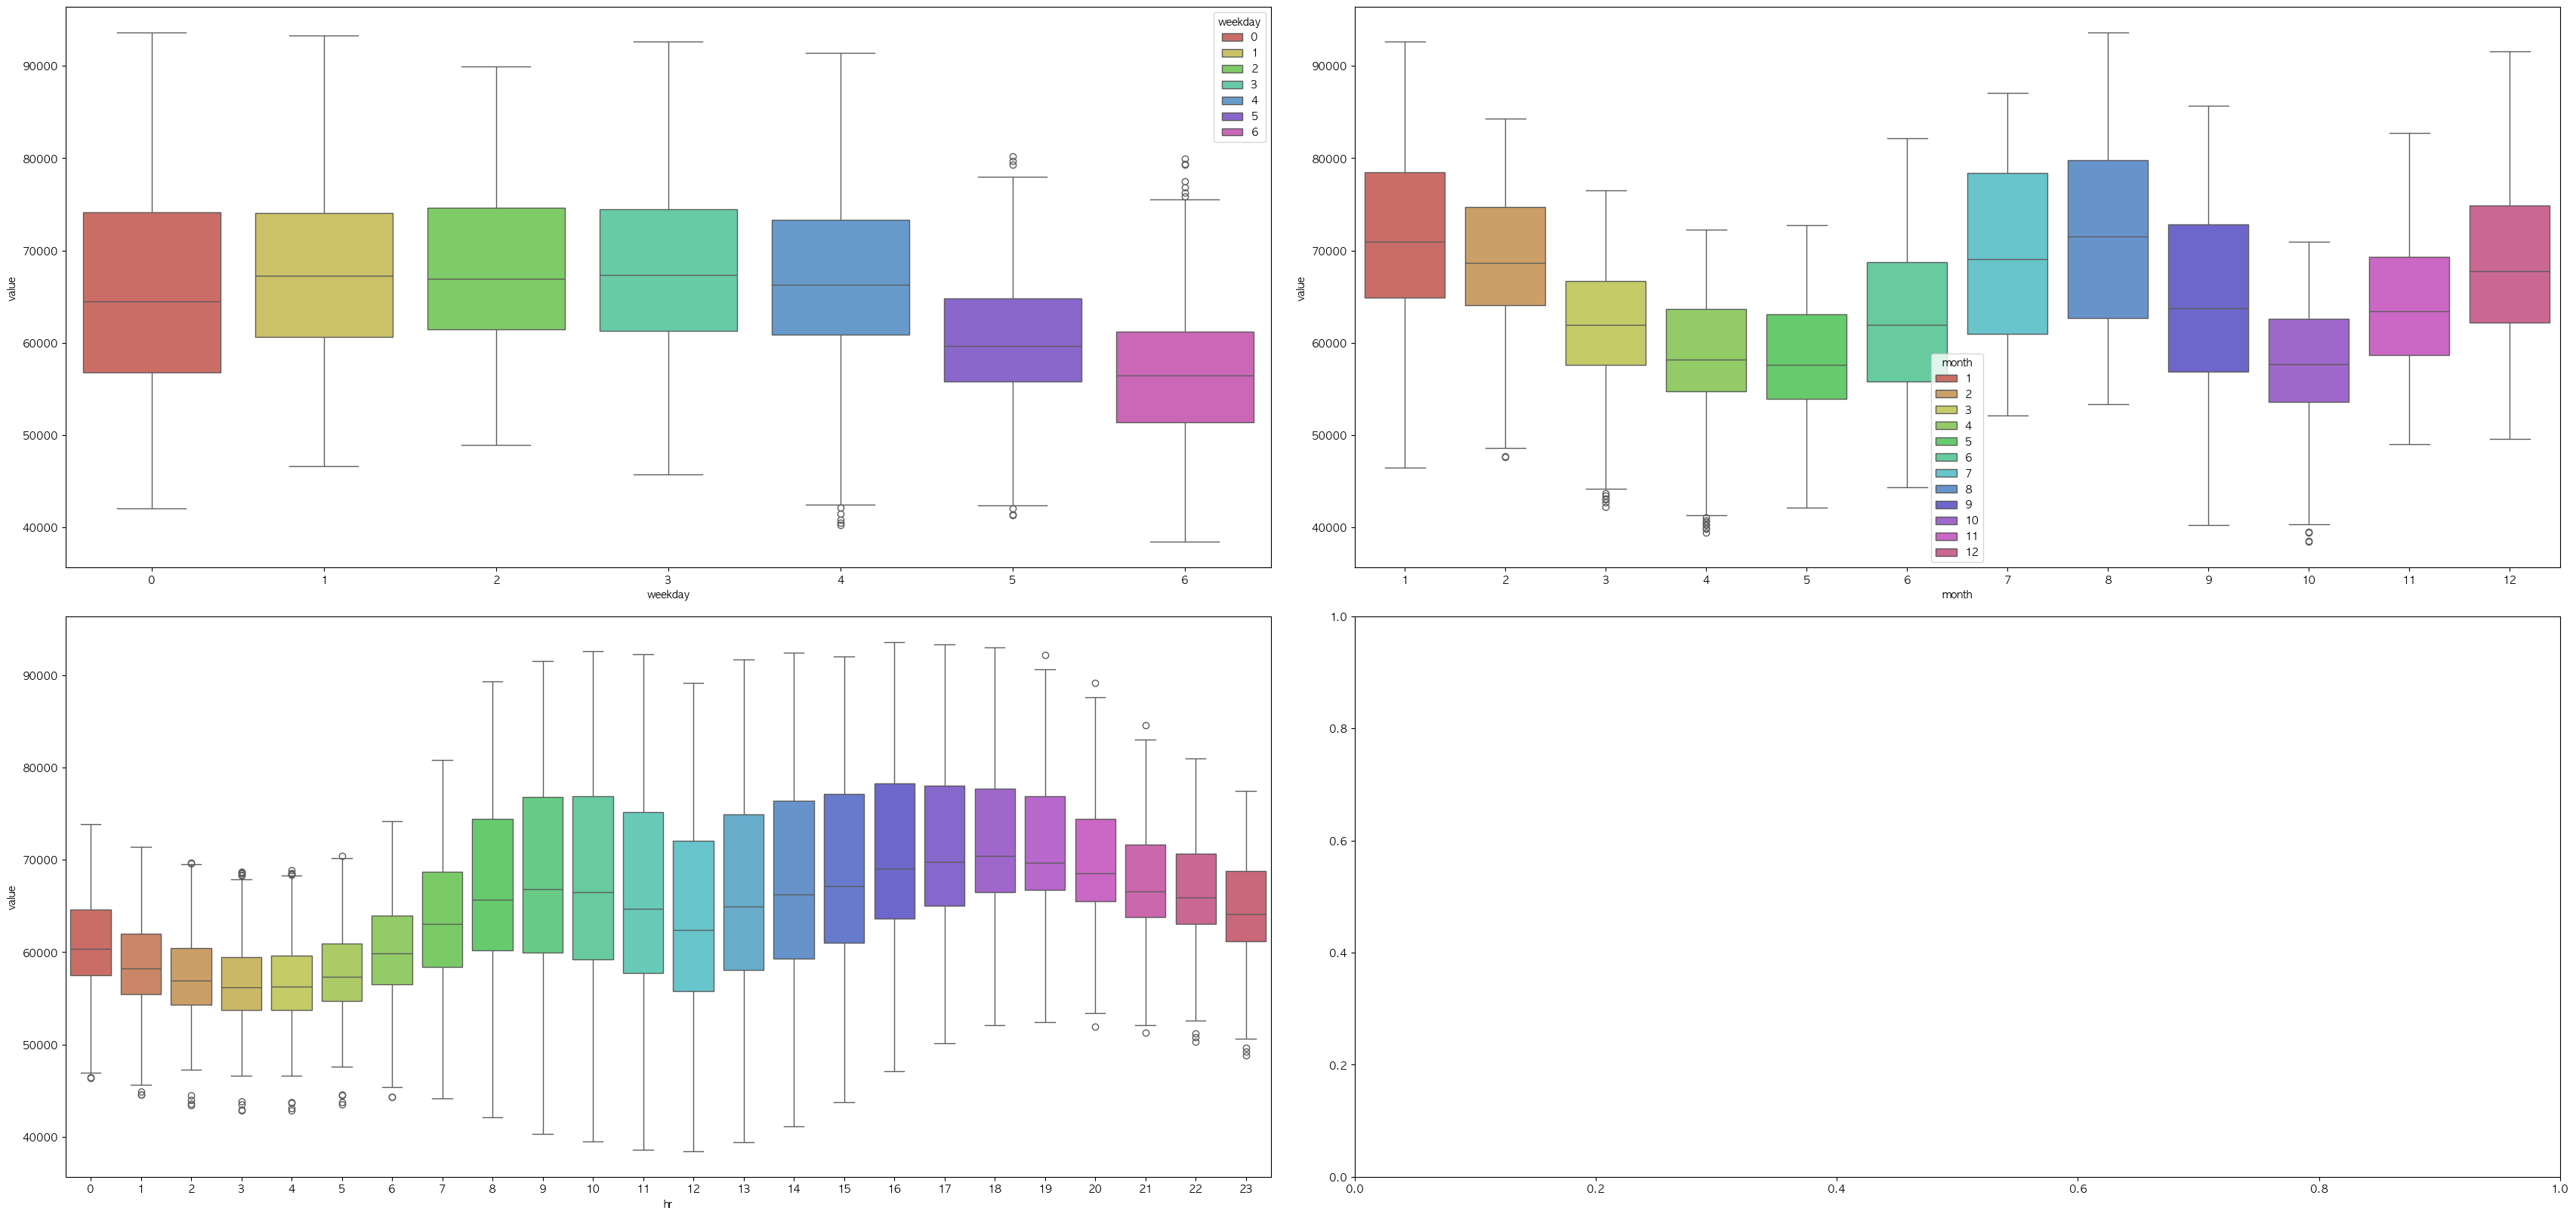

In [405]:
fig = plt.figure( figsize=(34,16), layout='constrained')
[[ax1,ax2],[ax3,ax4]] = fig.subplots(2,2)

sns.boxplot(x='weekday', y='value', data = df_data, order=[0,1,2,3,4,5,6], hue= 'weekday', ax=ax1, palette=sns.color_palette('hls', 7))

sns.boxplot(x='month', y='value', data = df_data, order=[1,2,3,4,5,6,7,8,9,10,11,12], hue= 'month', ax=ax2, palette=sns.color_palette('hls', 12))

sns.boxplot(x='hr', y='value', data = df_data, order=list(range(24)), hue= 'hr', ax=ax3, palette=sns.color_palette('hls', 24), legend=False)
